In [1]:
%pylab inline
import torch

Populating the interactive namespace from numpy and matplotlib


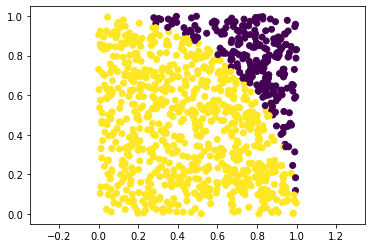

In [2]:
x = torch.rand(1000, 2)
x_in_circle = (x**2).sum(1) < 1

def classify(x, weights, bias):
    logit = (x * weights[None,:]).sum(1) + bias
    return logit > 0

def accuracy(pred_y):
    return (pred_y == x_in_circle).float().mean()

def show(y):
    scatter(*x.numpy().T, c=y.numpy())
    axis('equal')

def predict(x, weights, bias):
    logit = (x * weights[None,:]).sum(1) + bias
    return 1 / (1 + (-logit).exp())

def loss(p_y):
    return -(x_in_circle.float()*(p_y+1e-10).log() + (1 - x_in_circle.float())*(1-p_y+1e-10).log()).mean()

show(x_in_circle)

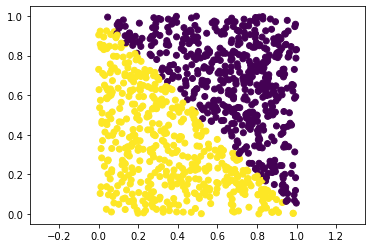

In [3]:
weights = torch.as_tensor([-1, -1], dtype=torch.float)
bias = torch.as_tensor(1, dtype=torch.float)

pred_y = classify(x, weights, bias)
p_y = predict(x, weights, bias)

show(pred_y)

In [5]:
import torch.utils.tensorboard as tb
%load_ext tensorboard
import tempfile
log_dir = tempfile.mkdtemp()
%tensorboard --logdir {log_dir} --reload_interval 1

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


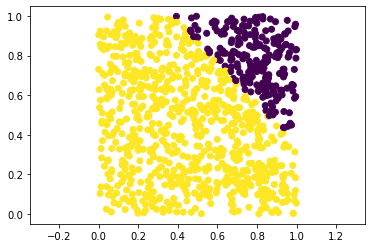

In [6]:
# Set up logging
logger = tb.SummaryWriter(log_dir + '/linear', flush_secs=1)

# Set up model
weights = torch.as_tensor([-1, -1], dtype=torch.float)
bias = torch.as_tensor(1, dtype=torch.float)

y = x_in_circle.float()

for iteration in range(5000):
    # Predict the labels and probabilities
    pred_y = classify(x, weights, bias)
    p_y = predict(x, weights, bias)
    
    # Compute the loss
    l = loss(p_y)
    
    # Logging
    logger.add_scalar('loss', l, global_step=iteration)
    logger.add_scalar('accuracy', accuracy(pred_y), global_step=iteration)
    if iteration % 10 == 0:
        fig = figure()
        show(pred_y)
        logger.add_figure('pred_y', fig, global_step=iteration)
        del fig
        
    # Compute the gradient
    gradient_l_f = p_y - y
    gradient_b = gradient_l_f.mean(0)
    gradient_w = (gradient_l_f[:,None]*x).mean(0)
    
    # Update the weights and bias using gradient descent
    weights -= 0.5*gradient_w
    bias -= 0.5*gradient_b
    
show(pred_y)